The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import math
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
x = dataset.iloc[: , 1:30].values
y = dataset.iloc[:, 30].values

In [6]:
print("Input Range : ", x.shape)
print("Output Range : ", y.shape)

Input Range :  (284807, 29)
Output Range :  (284807,)


In [7]:
print ("Class Labels : \n", y)

Class Labels : 
 [0 0 0 ... 0 0 0]


In [8]:
dataset.isnull().values.any()

False

Text(0, 0.5, 'No of occurences')

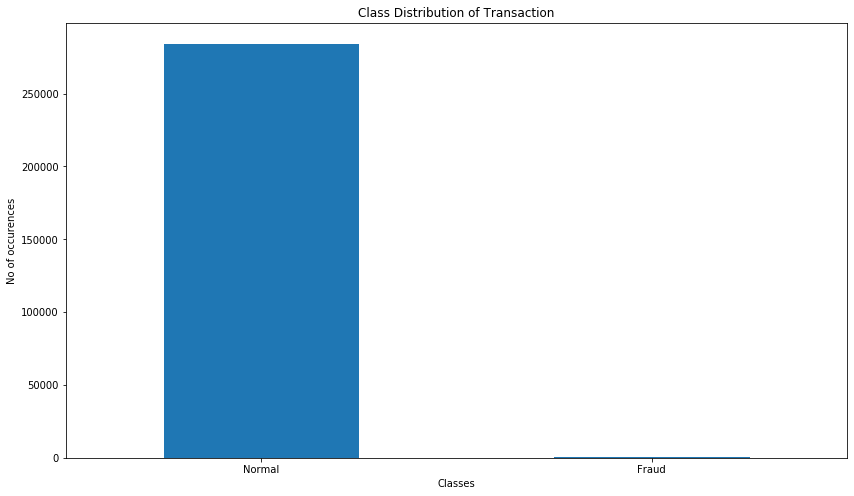

In [9]:
set_class = pd.value_counts(dataset['Class'], sort = True)

set_class.plot(kind = 'bar', rot=0)

plt.title("Class Distribution of Transaction")

plt.xticks(range(2), LABELS)

plt.xlabel("Classes")

plt.ylabel("No of occurences")

In [10]:
fraud_data = dataset[dataset['Class']==1]

normal_data = dataset[dataset['Class']==0]

In [11]:
print(fraud_data.shape,normal_data.shape)

(492, 31) (284315, 31)


In [12]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
normal_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

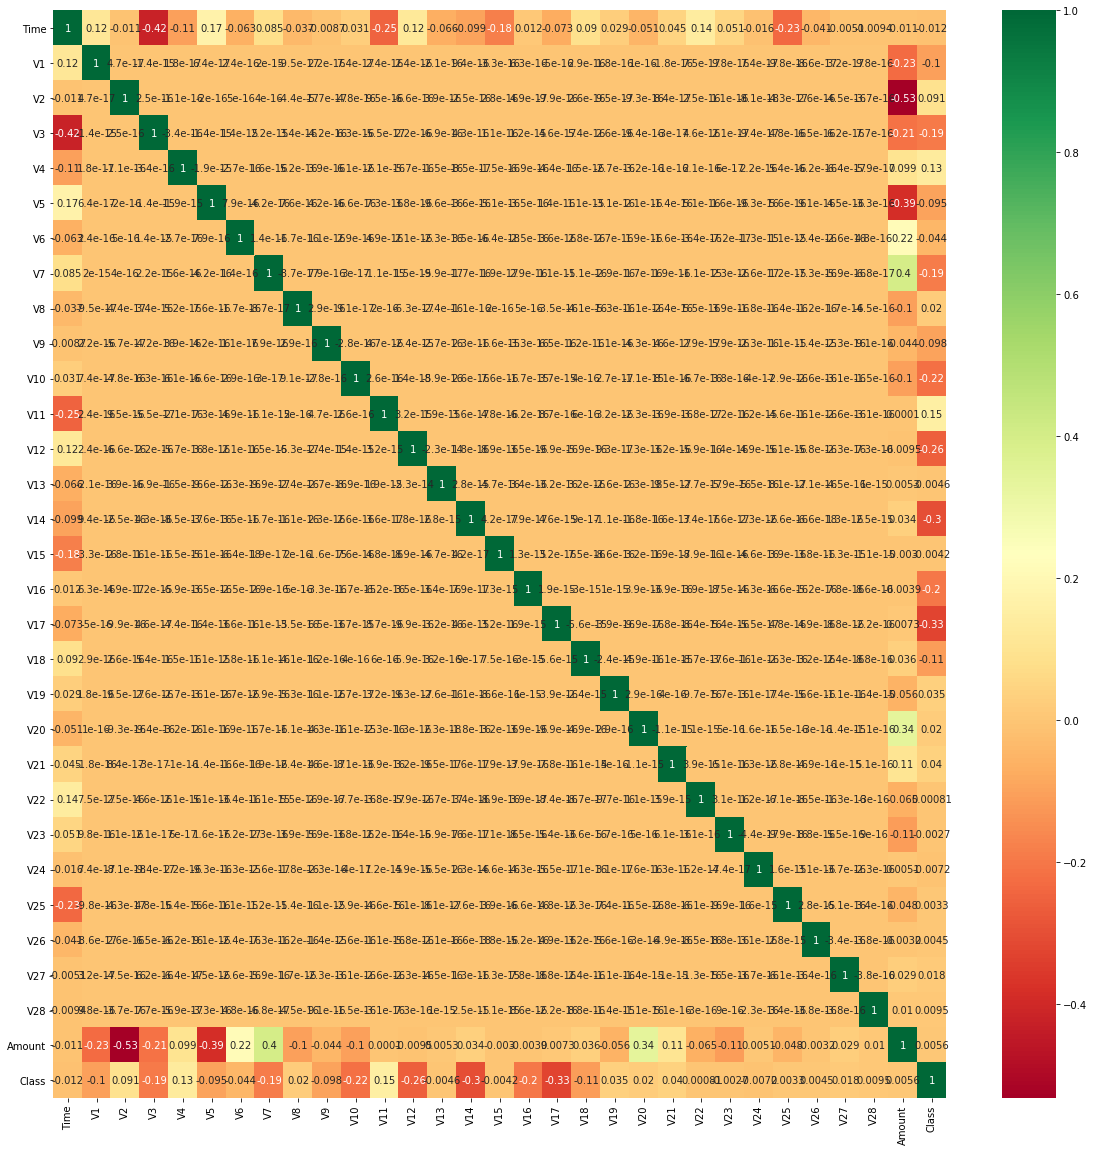

In [14]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)

<IPython.core.display.Javascript object>

In [16]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("ytest.shape  : ", ytest.shape)

xtrain.shape :  (213605, 29)
xtest.shape  :  (71202, 29)
ytrain.shape :  (213605,)
ytest.shape  :  (71202,)


In [17]:
stdsc = StandardScaler()
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [18]:
print("Training Set after Standardised : \n", xtrain[0])

Training Set after Standardised : 
 [ 1.04272047  0.06657394 -1.19051456  0.05060912  0.18235446 -1.31399333
  0.58133086 -0.40257892 -0.09319222  0.16481198  1.60036637  1.18028602
 -0.24273404  1.08764203 -0.35935009 -0.76863613 -0.28881862 -0.39536117
  0.13774039 -0.34055771  0.32484688  1.13026957  0.03716189  0.90724443
  0.61754959  0.39904973 -0.21031503 -0.2607924  -0.35356699]


In [19]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [20]:
y_pred_decision_tree = dt_classifier.predict(xtest)

In [21]:
print("y_pred_decision_tree : \n", y_pred_decision_tree)

y_pred_decision_tree : 
 [0 0 0 ... 0 0 0]


In [22]:
com_decision = confusion_matrix(ytest, y_pred_decision_tree)
print("confusion Matrix : \n", com_decision)

confusion Matrix : 
 [[71052    30]
 [   25    95]]


In [23]:
Accuracy_Model = ((com_decision[0][0] + com_decision[1][1]) / com_decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Model)

Error_rate_Model= ((com_decision[0][1] + com_decision[1][0]) / com_decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (com_decision[1][1] / (com_decision[1][1] + com_decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Model)

Accuracy_Decison    :  99.92275497879272
Error_rate_Decison  :  0.07724502120726946
Specificity_Decison :  76.0
Sensitivity_Decison :  99.96482687789299


In [24]:
svc_classifier = SVC(kernel = 'rbf', random_state =0)
svc_classifier.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [25]:
y_pred2 = svc_classifier.predict(xtest)

In [26]:
print("y_pred_randomforest : \n", y_pred2)

y_pred_randomforest : 
 [0 0 0 ... 0 0 0]


In [27]:
cm2 = confusion_matrix(ytest, y_pred2)
print("Confusion Matrix : \n\n", cm2)

Confusion Matrix : 

 [[71077     5]
 [   44    76]]


In [28]:
# Validating the Prediction
Accuracy_Model = ((cm2[0][0] + cm2[1][1]) / cm2.sum()) *100
print("Accuracy_svc    : ", Accuracy_Model)

Error_rate_Model = ((cm2[0][1] + cm2[1][0]) / cm2.sum()) *100
print("Error_rate_svc  : ", Error_rate_Model)

# True Fake Rate
Specificity_Model= (cm2[1][1] / (cm2[1][1] + cm2[0][1])) *100
print("Specificity_svc : ", Specificity_Model)

# True Genuine Rate
Sensitivity_Model= (cm2[0][0] / (cm2[0][0] + cm2[1][0])) *100
print("Sensitivity_svc : ", Sensitivity_Model)

Accuracy_svc    :  99.93118170837899
Error_rate_svc  :  0.06881829162102188
Specificity_svc :  93.82716049382715
Sensitivity_svc :  99.93813360329578
